### LDA mengunakaan Gensim

In [6]:
import pandas as pd
import concurrent.futures
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
import nltk


In [7]:
# Tokenizer function
def tokenize_text(text):
    return word_tokenize(text)

# Fungsi untuk menerapkan model LDA pada data yang telah diproses
def apply_lda(processed_texts):
    # Tokenisasi teks
    tokenized_texts = [tokenize_text(text) for text in processed_texts]
    
    # Buat kamus kata dari teks yang diproses
    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    # Menerapkan model LDA
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2)

    return lda_model, dictionary, corpus

# Fungsi untuk membuat word cloud
def create_wordcloud(lda_model, dictionary):
    # Ambil 10 kata kunci dari setiap topik
    keywords_per_topic = 10
    topics_keywords = []
    for index, topic in lda_model.show_topics(formatted=False):
        top_words = [word for word, _ in topic][:keywords_per_topic]
        topics_keywords.append(top_words)
    
    # Gabungkan kata kunci dari semua topik menjadi satu teks
    all_keywords = ' '.join([word for sublist in topics_keywords for word in sublist])
    
    # Buat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
    
    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Fungsi untuk membuat grafik Distribusi Jumlah Dokumen per Topik
def plot_doc_distribution(lda_model, corpus):
    doc_topics = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]
    
    plt.figure(figsize=(10, 5))
    plt.hist(doc_topics, bins=len(set(doc_topics)), color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribusi Jumlah Dokumen per Topik')
    plt.xlabel('Topik')
    plt.ylabel('Jumlah Dokumen')
    plt.xticks(range(lda_model.num_topics))
    plt.show()

# Fungsi untuk membuat grafik Distribusi Probabilitas Topik per Dokumen
def plot_topic_prob_distribution(lda_model, corpus):
    doc_topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]
    topics_prob = [[prob for _, prob in topic_dist] for topic_dist in doc_topic_distribution]
    
    plt.figure(figsize=(10, 5))
    for i in range(lda_model.num_topics):
        plt.hist([prob[i] for prob in topics_prob], bins=30, alpha=0.5, label=f'Topik {i+1}')
    plt.title('Distribusi Probabilitas Topik per Dokumen')
    plt.xlabel('Probabilitas')
    plt.ylabel('Jumlah Dokumen')
    plt.legend()
    plt.show()

In [8]:
df = pd.read_csv("filtered_content.csv")
print(len(df))

28066


In [9]:
df.head(10)

df.dropna(subset=['processed_text'], inplace=True)

In [10]:
lda_model, dictionary, corpus = apply_lda(df['processed_text'])

In [11]:
print("Topik dari model LDA:")
for index, topic in lda_model.print_topics():
    print(f"Topik {index+1}:")
    print(topic)

Topik dari model LDA:
Topik 1:
0.008*"jakarta" + 0.007*"2023" + 0.007*"presiden" + 0.007*"debat" + 0.006*"kpu" + 0.005*"ganjar" + 0.005*"jokowi" + 0.005*"partai" + 0.005*"calon" + 0.005*"baca"
Topik 2:
0.013*"presiden" + 0.010*"jokowi" + 0.009*"2023" + 0.008*"jakarta" + 0.007*"prabowo" + 0.007*"gibran" + 0.006*"baca" + 0.006*"ketua" + 0.005*"2024" + 0.005*"cawapres"
Topik 3:
0.011*"presiden" + 0.008*"prabowo" + 0.008*"2023" + 0.008*"indonesia" + 0.007*"calon" + 0.007*"jakarta" + 0.006*"ketua" + 0.006*"partai" + 0.006*"baca" + 0.006*"ganjar"
Topik 4:
0.007*"2023" + 0.007*"putus" + 0.007*"ganjar" + 0.006*"indonesia" + 0.006*"jakarta" + 0.004*"presiden" + 0.004*"10" + 0.004*"mk" + 0.004*"pilih" + 0.004*"ketua"
Topik 5:
0.009*"2023" + 0.009*"prabowo" + 0.008*"indonesia" + 0.007*"gibran" + 0.007*"presiden" + 0.007*"jakarta" + 0.005*"anies" + 0.005*"pilih" + 0.004*"jokowi" + 0.004*"masyarakat"


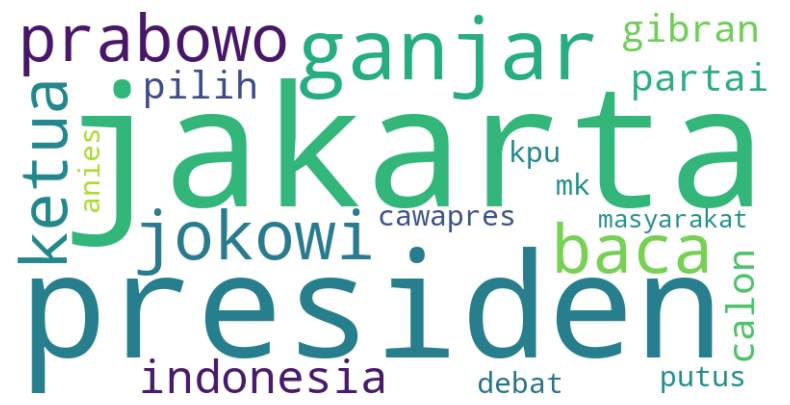

In [12]:
create_wordcloud(lda_model, dictionary)

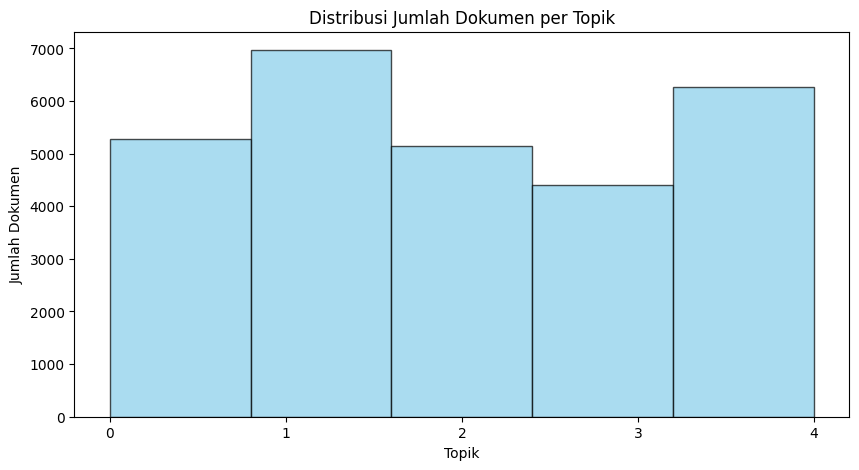

In [13]:
plot_doc_distribution(lda_model, corpus)

IndexError: list index out of range

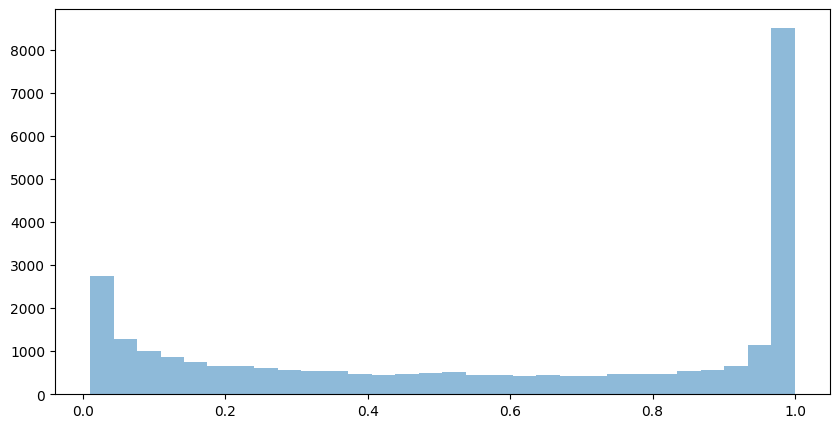

In [14]:
plot_topic_prob_distribution(lda_model, corpus)